In [1]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumMyeongjo',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumSquare',
 'NanumSquare',
 'NanumSquareRound',
 'NanumGothic']

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [4]:
# 186 Page
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 회귀분석
import statsmodels.formula.api as smf
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [5]:
df_train_x = pd.read_csv("./data/df_train1_x.txt", usecols=lambda column: column != "Unnamed: 0")
df_train_x

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2015,33425,1,5.0,17.43,1396.0,105.50,9,3713.889,2,4,2,0,0,0,1,1
1,2011,62148,1,5.0,11.70,1796.0,178.00,13,4780.615,2,4,4,0,0,0,1,1
2,2012,106000,1,8.0,12.99,2494.0,100.00,12,8833.333,3,4,3,1,0,0,0,1
3,2015,27000,1,5.0,17.97,1498.0,99.60,9,3000.000,2,3,2,0,0,0,1,0
4,2015,24350,2,5.0,19.81,1086.0,68.05,9,2705.556,2,4,2,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,2011,45000,1,7.0,15.10,1196.0,73.00,13,3461.538,2,3,2,0,0,0,1,1
3960,2017,43775,1,7.0,20.77,1248.0,88.76,7,6253.571,2,1,2,1,0,0,0,1
3961,2011,102000,1,5.0,15.06,1995.0,177.00,13,7846.154,2,3,4,1,0,0,0,0
3962,2015,100000,2,7.0,12.99,2494.0,100.60,9,11111.111,3,3,3,1,0,0,0,1


In [6]:
df_train_y = pd.read_csv("./data/df_train1_y.txt", usecols=lambda column: column != "Unnamed: 0")
df_train_y

,Price
0,6898.32
1,13490.05
2,12876.86
3,10347.48
4,4598.88
...,...
3959,3449.16
3960,12677.58
3961,21078.20
3962,15712.84


### 편의를 위해 잠시 valid 파일을 test로 이름을 바꿔쓰겠습니다.. 어차피 test 들어가는 파일 아니니까!?

In [7]:
df_test_x = pd.read_csv("./data/df_valid_x.txt", usecols=lambda column: column != "Unnamed: 0")
df_test_x

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,55000,1,7.0,15.10,2179.0,140.00,10,5500.000,3,4,2,1,0,0,0,1
1,2011,108905,2,8.0,11.79,2179.0,120.00,13,8377.308,3,2,2,1,0,0,0,0
2,2013,75000,1,7.0,20.77,1248.0,88.80,11,6818.182,2,4,2,1,0,0,0,1
3,2010,77332,2,5.0,23.00,1396.0,90.00,14,5523.714,2,4,2,1,0,0,0,1
4,2014,32982,1,5.0,22.69,1995.0,190.00,10,3298.200,2,1,4,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2015,20000,1,5.0,21.10,814.0,55.20,9,2222.222,1,3,2,0,0,0,1,1
987,2012,41000,1,5.0,16.47,1198.0,73.90,12,3416.667,2,4,3,0,0,0,1,1
988,2011,50000,2,5.0,18.50,1197.0,85.80,13,3846.154,2,4,2,0,0,0,1,1
989,2018,25082,1,5.0,28.40,1248.0,73.75,6,4180.333,2,2,2,1,0,0,0,0


In [8]:
df_test_y = pd.read_csv("./data/df_valid_y.txt", usecols=lambda column: column != "Unnamed: 0")
df_test_y

,Price
0,15023.01
1,9519.68
2,10040.89
3,5595.30
4,28436.41
...,...
986,4077.67
987,4752.18
988,2299.44
989,12830.88


In [9]:
df_test = pd.concat([df_test_x, df_test_y], axis=1)
df_test['Price_log'] = np.log1p(df_test['Price'])

In [10]:
df_train_x = df_train_x.drop(['Year'], axis = 1)

In [11]:
df_train_x.head()

,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,33425,1,5.0,17.43,1396.0,105.50,9,3713.889,2,4,2,0,0,0,1,1
1,62148,1,5.0,11.70,1796.0,178.00,13,4780.615,2,4,4,0,0,0,1,1
2,106000,1,8.0,12.99,2494.0,100.00,12,8833.333,3,4,3,1,0,0,0,1
3,27000,1,5.0,17.97,1498.0,99.60,9,3000.000,2,3,2,0,0,0,1,0
4,24350,2,5.0,19.81,1086.0,68.05,9,2705.556,2,4,2,0,0,0,1,1


In [12]:
df_test_x = df_test_x.drop(['Year'], axis = 1)
df_test_x.head()

,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,55000,1,7.0,15.10,2179.0,140.0,10,5500.000,3,4,2,1,0,0,0,1
1,108905,2,8.0,11.79,2179.0,120.0,13,8377.308,3,2,2,1,0,0,0,0
2,75000,1,7.0,20.77,1248.0,88.8,11,6818.182,2,4,2,1,0,0,0,1
3,77332,2,5.0,23.00,1396.0,90.0,14,5523.714,2,4,2,1,0,0,0,1
4,32982,1,5.0,22.69,1995.0,190.0,10,3298.200,2,1,4,1,0,0,0,0


In [13]:
# price(목표변수) log변환
df_train_y = np.log1p(df_train_y)
df_test_y = np.log1p(df_test_y)

In [14]:
# Data 구조 확인
print("Data 구조:", df_train_x.columns)
print()
print("목표 : ", df_train_y.columns)

Data 구조: Index(['Kilometers_Driven', 'Owner_Type', 'Seats', 'Mileage(kmpl)',
       'Engine(CC)', 'Power(bhp)', 'Car_Age', 'Km_per_Year', 'Size',
       'GDP_Group', 'Brand_Segment', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

목표 :  Index(['Price'], dtype='object')


In [15]:
# 회귀 모델
lr_model = smf.ols(formula = "Price_log ~  Owner_Type + Seats + Q('Mileage(kmpl)') + Q('Engine(CC)') + Q('Power(bhp)') + Car_Age + Km_per_Year + Size + GDP_Group + Brand_Segment +  Transmission_Manual", data = df_test)

lr_result = lr_model.fit()

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split = 20, max_depth = 4 )
dt_model.fit(df_train_x, df_train_y)

# Random Forest
rf_model = RandomForestRegressor(random_state=4321, n_estimators = 100, min_samples_leaf = 2,
                                 min_samples_split = 4, max_depth = 14)
rf_model.fit(df_train_x, df_train_y)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators = 90, min_samples_leaf = 7,
                                     min_samples_split = 18, max_depth = 5, learning_rate = 0.2)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=7,
                          min_samples_split=18, n_estimators=90,
                          random_state=1234)

In [18]:
# 모델 리스트, 그래프를 그리기 생성 목적
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
# 평가 리스트 초기화
mse, rmse, mae, mape = [],[],[],[]

# 회귀분석예측
lr_y_pred = lr_result.predict(df_test)

# 평가
mse.append(mean_squared_error(df_test['Price_log'], lr_y_pred))
rmse.append(mean_squared_error(df_test_y, lr_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['Price_log'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Price_log'], lr_y_pred))

# 의사결정나무예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(mean_squared_error(df_test_y, dt_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

# 랜덤포레스트예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(mean_squared_error(df_test_y, rf_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

# 그래디언트부스팀예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(mean_squared_error(df_test_y, gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

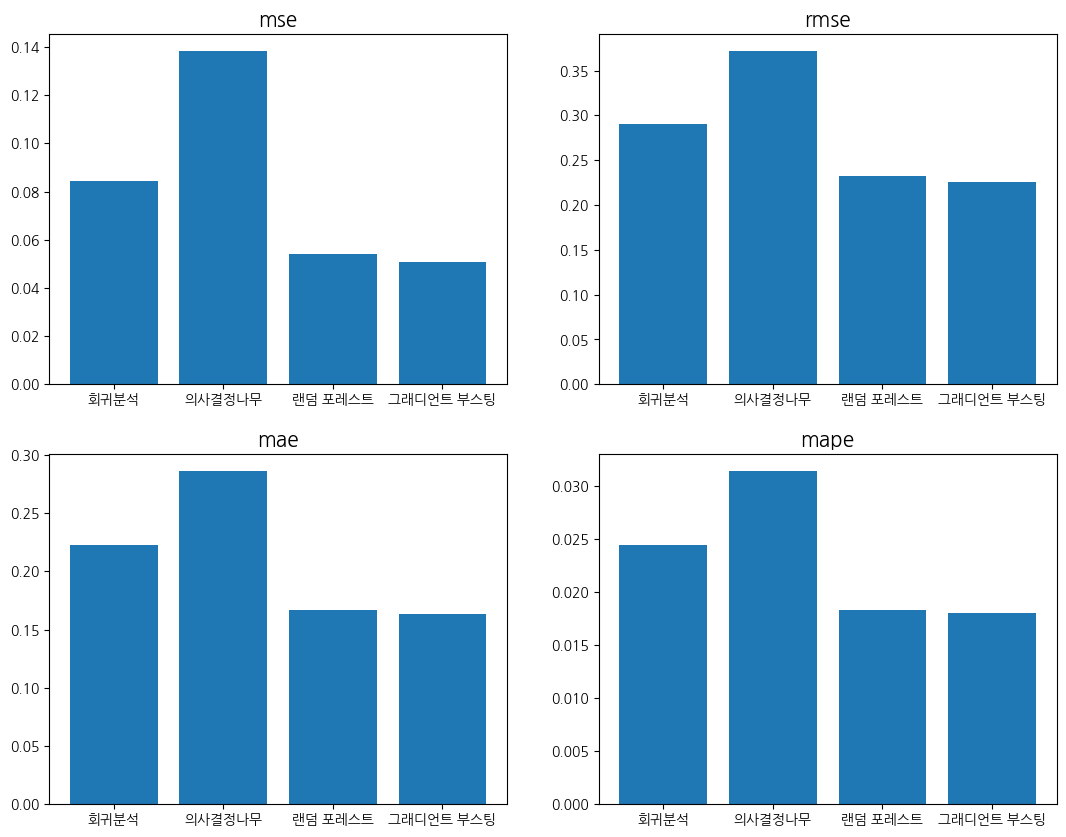

In [21]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)

## 예뻐저라 얍

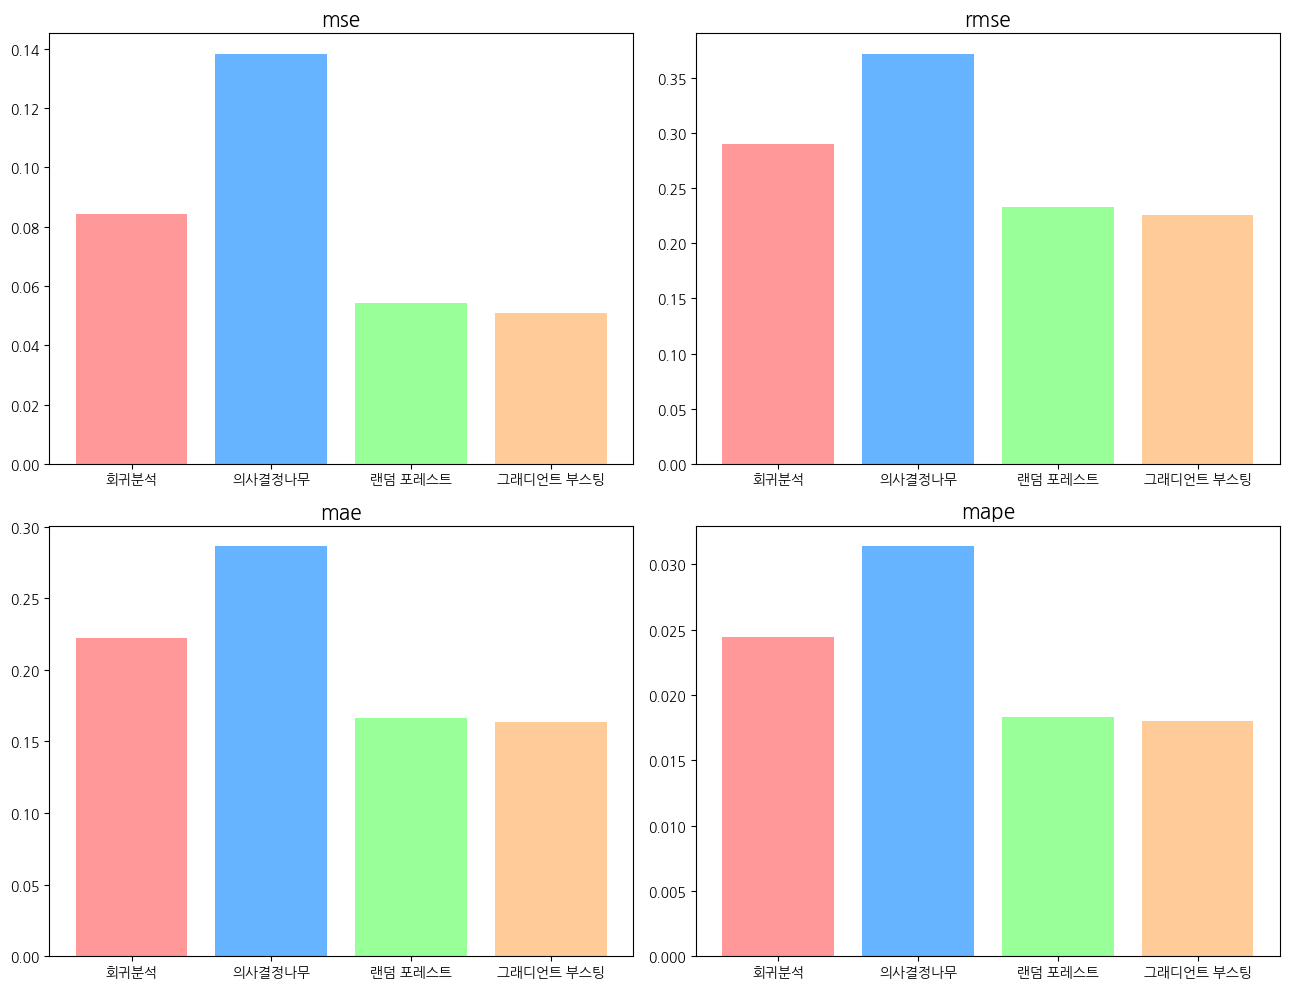

In [22]:
import matplotlib.pyplot as plt

# 색상 리스트 (원하는 대로 바꿔도 돼)
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB6C1', '#FFD700']

fig, ax = plt.subplots(2, 2, figsize=(13, 10))

# 모델 개수만큼 색상 리스트 자르기
c = colors[:len(models)]

ax[0, 0].bar(models, mse, color=c)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse, color=c)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae, color=c)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape, color=c)
ax[1, 1].set_title("mape").set_fontsize(15)

plt.tight_layout()
plt.show()


## 회귀모델

## 의사결정나무

## 랜덤포레스트

## 그래디언트 부스팅